In [1]:
import pandas as pd
import numpy as np
import os
import torch
import matplotlib.pyplot as plt

import torch
from torch import nn
from torch.utils.data import TensorDataset, DataLoader


from sklearn import linear_model
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import roc_auc_score, confusion_matrix

from scipy.stats import spearmanr

import matplotlib.pyplot as plt
# aggregate all the data

base_path = "/home/labs/fleishman/itayta/new_fitness_repo/fitness_learning/notebooks/"

def get_one_hot_encoding(sdf, first_col, last_col):
    si = np.where(sdf.columns == first_col)[0][0]
    ei = np.where(sdf.columns == last_col)[0][0]
    
    one_hot_encoding = torch.from_numpy(pd.get_dummies(sdf[sdf.columns[si:(ei+1)]]).to_numpy()).to(torch.int64)

    return(one_hot_encoding)
    
df = pd.read_csv("data/nmt/nmt_full_seq.csv")



base_path = "/home/labs/fleishman/itayta/new_fitness_repo/fitness_learning/notebooks/"

embedding_paths = ["%s/data/nmt/embeddings/esm_35m" % base_path]


classifier_embeddings_path = embedding_paths[0]

si = np.where(df.columns == "1")[0][0]
ei = np.where(df.columns == "272")[0][0]+1


positions_with_mutations =  np.array([len(pd.unique(df.iloc[:,i])) > 1 for i in range(si,ei)])


new_df_columns = zip(df.columns[si:ei][positions_with_mutations],
                            df.iloc[0,si:ei][positions_with_mutations])


new_df_columns =["%s%s" % (b,a) for a,b in new_df_columns]     


new_df =\
    pd.concat([df["name"],
            df["seq"],
            df["activity"], 
            df["num_muts"],
            df["p1"],
            df["p2"],
            df.iloc[:,si:ei].iloc[:,positions_with_mutations]
            ], axis=1)


new_df.columns = ['name', 'seq', 'activity', 'num_muts', 'p1', 'p2'] + new_df_columns
print(new_df)

one_hot = get_one_hot_encoding(new_df, "Y20", "F253")
si = np.where(new_df.columns == "Y20")[0][0]
ei = np.where(new_df.columns == "F253")[0][0]
assert one_hot.shape[1] == sum([len(pd.unique(new_df[C])) for C in new_df.columns[si:(ei+1)]])

labels = torch.load(os.path.join(classifier_embeddings_path, "y_values.pt"))
indices = torch.load(os.path.join(classifier_embeddings_path, "indices.pt"))
embeddings = torch.load(os.path.join(classifier_embeddings_path, "embeddings.pt"))

          name                                                seq  activity  \
0    Wild type  MESGFTSKDTYLSHFNPRDYLEKYYKFGSRHSAESQILKHLLKNLF...       1.0   
1       FL1_01  MESGFTSKDTYLSHFNPRDHLEKYYKFGSRHSAESQILKHLLKNLF...       0.1   
2       FL1_02  MESGFTSKDTYLSHFNPRDYLEKYYKFGSRHSAESQILKHLLKNLF...      21.2   
3       FL1_03  MESGFTSKDTYLSHFNPRDYLEKYYKFGSRHSAESQILKHLLKNLF...       5.0   
4       FL1_04  MESGFTSKDTYLSHFNPRDFLEKYYKFGSRHSAESQILKHLLKNLF...       3.7   
..         ...                                                ...       ...   
233   FL3_H157  MESGFTSKDTYLSHFNPRDYLEKYYKFGSRHSAESQWLKHLLKNLF...     335.9   
234   FL3_H158  MESGFTSKDTYLSHFNPRDYLEKYYKFGSRHSAESQWLKHLLKNLF...     384.7   
235   FL3_H159  MESGFTSKDTYLSHFNPRDYLEKYYKFGSRHSAESQWLKHLLKNLF...     147.6   
236   FL3_H161  MESGFTSKDTYLSHFNPRDYLEKYYKFGSRHSAESQWLKHLLKNLF...    1196.9   
237   FL3_H162  MESGFTSKDTYLSHFNPRDYLEKYYKFGSRHSAESQWLKHLLKNLF...      90.3   

     num_muts    p1    p2 Y20 Y24 E34 I37  ... L199

/tmp/ipykernel_3220177/3330641031.py:76: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  labels = torch.load(os.path.join(classifier_embeddings_path, "y_values.pt"))
/tmp/ipyk

(array([ 1.,  0.,  1.,  9., 40.,  1.,  3., 31., 80., 72.]),
 array([ 0. ,  1.1,  2.2,  3.3,  4.4,  5.5,  6.6,  7.7,  8.8,  9.9, 11. ]),
 <BarContainer object of 10 artists>)

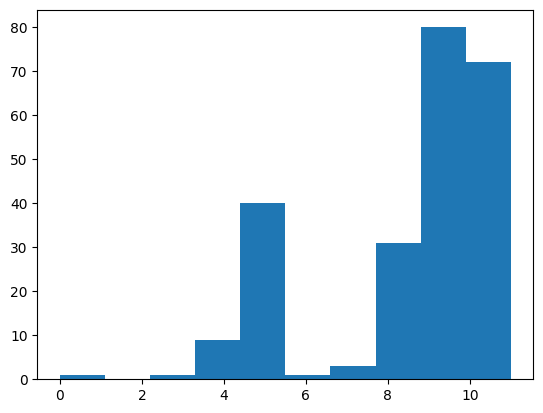

In [3]:
plt.hist(new_df["num_muts"])

/tmp/ipykernel_2456086/3150956055.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  labels = torch.load(os.path.join(classifier_embeddings_path, "y_values.pt"))
/tmp/ipyke

Fitting MLP over 238x480 embeddings to 238 labels
